In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import pickle
import sklearn.metrics as metrics
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from keras import backend as K
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/Data Mining Project

/content/drive/My Drive/Data Mining Project


In [ ]:
def retransform_data(scaler, data):
  data = scaler.inverse_transform(data)
  data = np.exp(data) - 1
  return data

In [ ]:
df_train = pd.read_csv('datasets/Karpos/train.csv', index_col=0)
df_test = pd.read_csv('datasets/Karpos/test.csv', index_col=0)

In [ ]:
df_train['PM10_before_24h'] = df_train['PM10'].shift(24)
df_train['PM25_before_24h'] = df_train['PM25'].shift(24)
df_train['PM10_rolling_6h_mean'] = df_train['PM10'].rolling(6).mean()
df_train['PM25_rolling_6h_mean'] = df_train['PM25'].rolling(6).mean()
df_test['PM10_before_24h'] = df_test['PM10'].shift(24)
df_test['PM25_before_24h'] = df_test['PM25'].shift(24)
df_test['PM10_rolling_6h_mean'] = df_test['PM10'].rolling(6).mean()
df_test['PM25_rolling_6h_mean'] = df_test['PM25'].rolling(6).mean()
df_train = df_train.dropna()
df_test = df_test.dropna()

**PM10 prediction**


In [ ]:
df_train_PM10 = df_train.copy()
df_test_PM10 = df_test.copy()
df_train_PM10.drop(['PM25', 'SO2'], axis=1, inplace=True)
df_test_PM10.drop(['PM25', 'SO2'], axis=1, inplace=True)

y_train_PM10 = np.array(df_train_PM10["PM10"])
X_train_PM10 = df_train_PM10
X_train_PM10.drop(['PM10'], axis=1, inplace=True)
X_train_PM10 = np.array(X_train_PM10)
y_test_PM10 = np.array(df_test_PM10["PM10"])
X_test_PM10 = df_test_PM10
X_test_PM10.drop(['PM10'], axis=1, inplace=True)
X_test_PM10 = np.array(X_test_PM10)


In [ ]:
with open(f'./scalers_Karpos/PM10', 'rb') as f:
  scaler = pickle.load(f)

LR: 0.783115 (0.060613)
KNN7-Manhattan: 0.609262 (0.124123)
KNN7-Euclidean: 0.611498 (0.110444)
KNN15-Uniform: 0.639842 (0.106235)
KNN15-Distance: 0.640585 (0.105551)
RF-20: 0.763638 (0.069122)
RF-40-MSE: 0.770819 (0.067276)
RF-40-MAE: 0.774342 (0.065229)
DTR-MSE: 0.524407 (0.139815)
DTR-MAE: 0.511019 (0.139547)
DTR-max_features: 0.372613 (0.191719)
SVR-auto: 0.759769 (0.060211)
SVR-scale: 0.737993 (0.059523)
SVR-10: 0.644423 (0.098448)
RMSE for LR prediction on PM10 concentration:19.902000
R2 score for LR prediction on PM10 concentration:0.830000


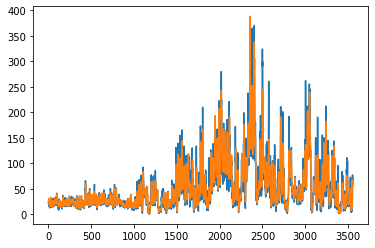

RMSE for KNN7-Manhattan prediction on PM10 concentration:25.956000
R2 score for KNN7-Manhattan prediction on PM10 concentration:0.710000


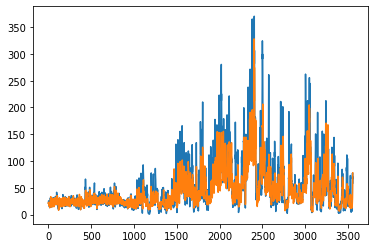

RMSE for KNN7-Euclidean prediction on PM10 concentration:26.550000
R2 score for KNN7-Euclidean prediction on PM10 concentration:0.697000


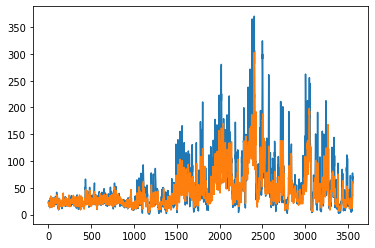

RMSE for KNN15-Uniform prediction on PM10 concentration:26.261000
R2 score for KNN15-Uniform prediction on PM10 concentration:0.704000


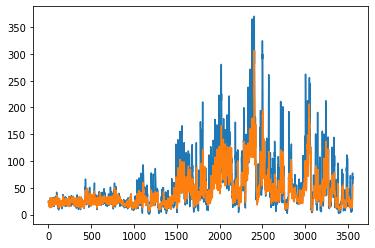

RMSE for KNN15-Distance prediction on PM10 concentration:26.238000
R2 score for KNN15-Distance prediction on PM10 concentration:0.704000


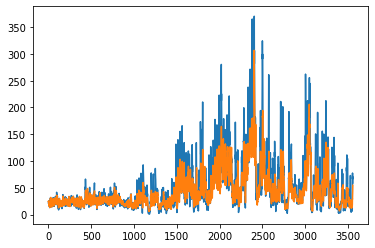

RMSE for RF-20 prediction on PM10 concentration:21.167000
R2 score for RF-20 prediction on PM10 concentration:0.807000


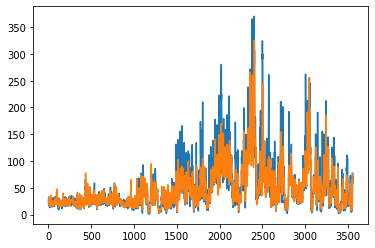

RMSE for RF-40-MSE prediction on PM10 concentration:21.015000
R2 score for RF-40-MSE prediction on PM10 concentration:0.810000


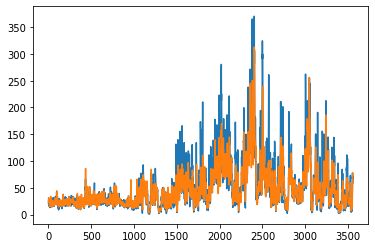

RMSE for RF-40-MAE prediction on PM10 concentration:20.868000
R2 score for RF-40-MAE prediction on PM10 concentration:0.813000


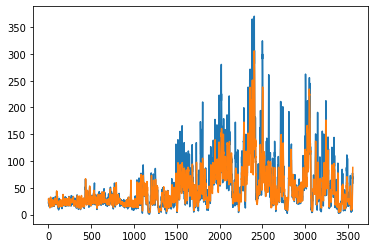

RMSE for DTR-MSE prediction on PM10 concentration:27.203000
R2 score for DTR-MSE prediction on PM10 concentration:0.682000


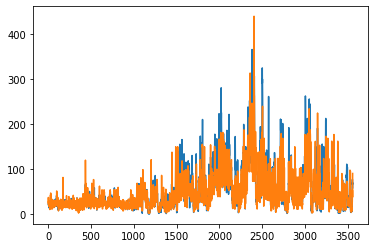

RMSE for DTR-MAE prediction on PM10 concentration:28.369000
R2 score for DTR-MAE prediction on PM10 concentration:0.654000


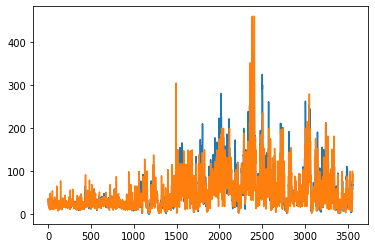

RMSE for DTR-max_features prediction on PM10 concentration:30.353000
R2 score for DTR-max_features prediction on PM10 concentration:0.604000


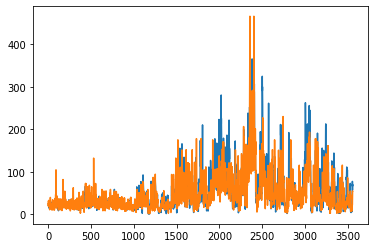

RMSE for SVR-auto prediction on PM10 concentration:23.933000
R2 score for SVR-auto prediction on PM10 concentration:0.754000


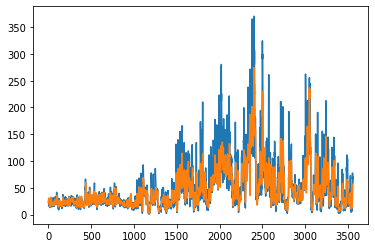

RMSE for SVR-scale prediction on PM10 concentration:25.244000
R2 score for SVR-scale prediction on PM10 concentration:0.726000


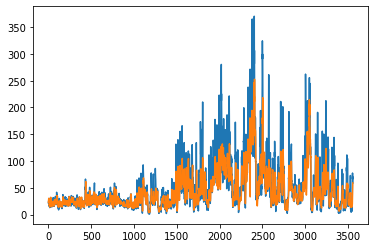

RMSE for SVR-10 prediction on PM10 concentration:27.268000
R2 score for SVR-10 prediction on PM10 concentration:0.680000


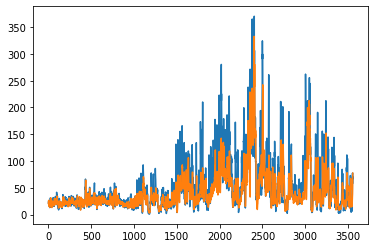

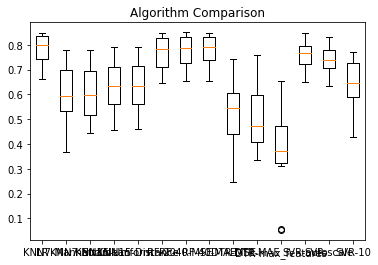

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN7-Manhattan', KNeighborsRegressor(n_neighbors=7, metric='manhattan'))) # Manhattan distance 
models.append(('KNN7-Euclidean', KNeighborsRegressor(n_neighbors=7))) # Euclidean distance
models.append(('KNN15-Uniform', KNeighborsRegressor(n_neighbors=15))) # Uniform weights
models.append(('KNN15-Distance', KNeighborsRegressor(n_neighbors=15, weights='distance'))) # Distance weights
models.append(('RF-20', RandomForestRegressor(n_estimators = 20, random_state=0))) # Ensemble method - collection of many decision trees
models.append(('RF-40-MSE', RandomForestRegressor(n_estimators = 40, random_state=0))) # mean squared error
models.append(('RF-40-MAE', RandomForestRegressor(n_estimators = 40, random_state=0, criterion='mae'))) # mean absolute error
models.append(('DTR-MSE', DecisionTreeRegressor(random_state=0)))
models.append(('DTR-MAE', DecisionTreeRegressor(random_state=0, criterion='mae')))
models.append(('DTR-max_features', DecisionTreeRegressor(random_state=0, max_features='sqrt'))) # sqrt features
models.append(('SVR-auto', SVR(gamma='auto'))) # kernel = rbf
models.append(('SVR-scale', SVR(gamma='scale'))) 
models.append(('SVR-10', SVR(C=10))) # regularization parameter C=10
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=10)
    
 cv_results = cross_val_score(model, X_train_PM10, y_train_PM10, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

for name, model in models:
  model.fit(X_train_PM10, y_train_PM10)
  y_pred_PM10 = model.predict(X_test_PM10)
  y_pred = retransform_data(scaler, y_pred_PM10)
  y_pred = y_pred.flatten()
  y_true = retransform_data(scaler, y_test_PM10)
  rmse = round(float(np.sqrt(K.eval(tf.keras.losses.mean_squared_error(y_true, y_pred)))), 3)
  r2 = round(r2_score(y_true, y_pred), 3)
  print('RMSE for %s prediction on PM10 concentration:%f' % (name, rmse))
  print('R2 score for %s prediction on PM10 concentration:%f' % (name, r2))
  plt.plot(y_true)
  plt.plot(y_pred)
  plt.show()
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

**PM25 prediction**


In [ ]:
df_train_PM25 = df_train.copy()
df_test_PM25 = df_test.copy()
df_train_PM25.drop(['PM10', 'SO2'], axis=1, inplace=True)
df_test_PM25.drop(['PM10', 'SO2'], axis=1, inplace=True)

y_train_PM25 = np.array(df_train_PM25["PM25"])
X_train_PM25 = df_train_PM25
X_train_PM25.drop(['PM25'], axis=1, inplace=True)
X_train_PM25 = np.array(X_train_PM25)
y_test_PM25 = np.array(df_test_PM25["PM25"])
X_test_PM25 = df_test_PM25
X_test_PM25.drop(['PM25'], axis=1, inplace=True)
X_test_PM25 = np.array(X_test_PM25)

In [ ]:
with open(f'./scalers_Karpos/PM25', 'rb') as f:
  scaler = pickle.load(f)

LR: 0.778327 (0.057485)
KNN7-Manhattan: 0.597679 (0.104279)
KNN7-Euclidean: 0.589776 (0.111619)
KNN15-Uniform: 0.615841 (0.106593)
KNN15-Distance: 0.616835 (0.105905)
RF-20: 0.763510 (0.063295)
RF-40-MSE: 0.772095 (0.064132)
RF-40-MAE: 0.773570 (0.062635)
DTR-MSE: 0.467922 (0.213832)
DTR-MAE: 0.478985 (0.164805)
DTR-max_features: 0.349822 (0.195685)
SVR-auto: 0.763765 (0.065577)
SVR-scale: 0.735630 (0.067702)
SVR-10: 0.618706 (0.164554)
RMSE for LR prediction on PM25 concentration:9.992000
R2 score for LR prediction on PM25 concentration:0.856000


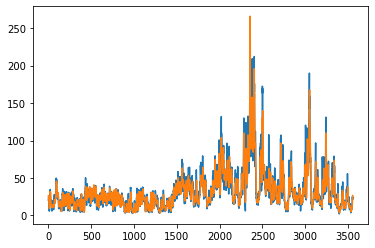

RMSE for KNN7-Manhattan prediction on PM25 concentration:11.923000
R2 score for KNN7-Manhattan prediction on PM25 concentration:0.796000


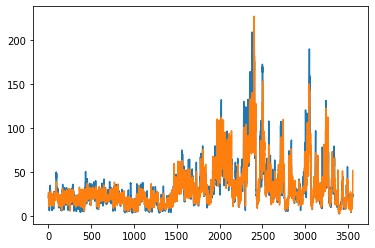

RMSE for KNN7-Euclidean prediction on PM25 concentration:12.522000
R2 score for KNN7-Euclidean prediction on PM25 concentration:0.775000


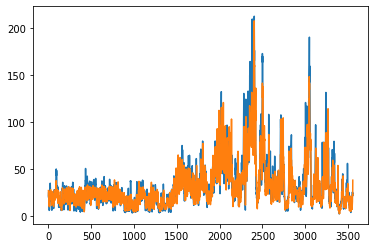

RMSE for KNN15-Uniform prediction on PM25 concentration:11.807000
R2 score for KNN15-Uniform prediction on PM25 concentration:0.800000


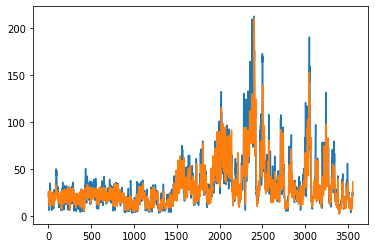

RMSE for KNN15-Distance prediction on PM25 concentration:11.800000
R2 score for KNN15-Distance prediction on PM25 concentration:0.800000


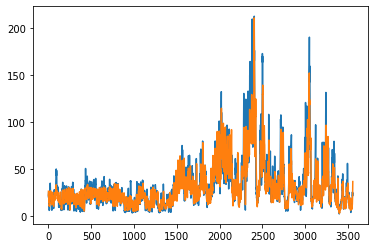

RMSE for RF-20 prediction on PM25 concentration:9.527000
R2 score for RF-20 prediction on PM25 concentration:0.870000


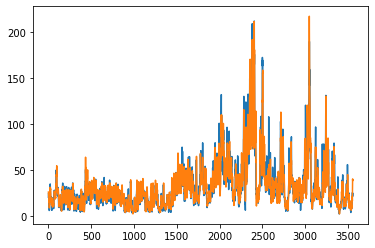

RMSE for RF-40-MSE prediction on PM25 concentration:9.126000
R2 score for RF-40-MSE prediction on PM25 concentration:0.880000


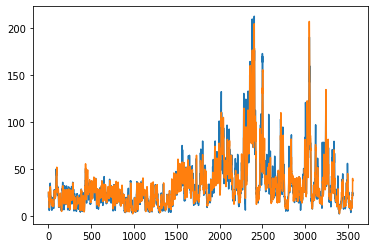

RMSE for RF-40-MAE prediction on PM25 concentration:9.199000
R2 score for RF-40-MAE prediction on PM25 concentration:0.878000


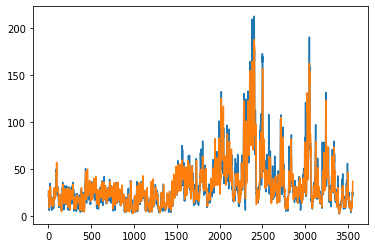

RMSE for DTR-MSE prediction on PM25 concentration:16.648000
R2 score for DTR-MSE prediction on PM25 concentration:0.602000


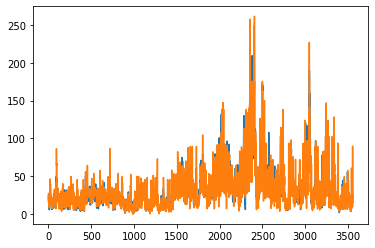

RMSE for DTR-MAE prediction on PM25 concentration:16.483000
R2 score for DTR-MAE prediction on PM25 concentration:0.609000


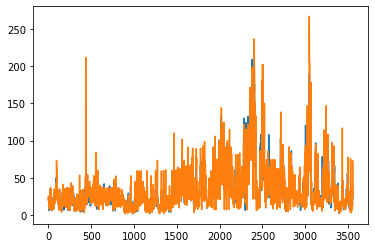

RMSE for DTR-max_features prediction on PM25 concentration:19.184000
R2 score for DTR-max_features prediction on PM25 concentration:0.471000


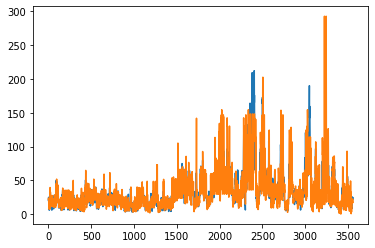

RMSE for SVR-auto prediction on PM25 concentration:10.685000
R2 score for SVR-auto prediction on PM25 concentration:0.836000


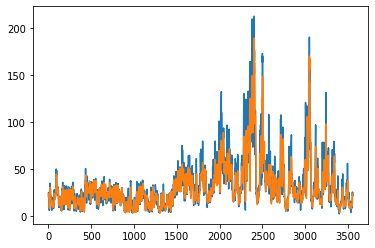

RMSE for SVR-scale prediction on PM25 concentration:11.174000
R2 score for SVR-scale prediction on PM25 concentration:0.820000


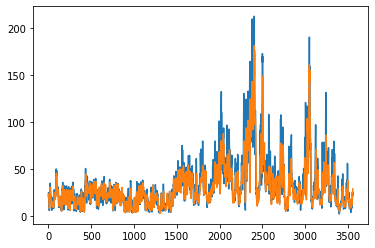

RMSE for SVR-10 prediction on PM25 concentration:12.781000
R2 score for SVR-10 prediction on PM25 concentration:0.765000


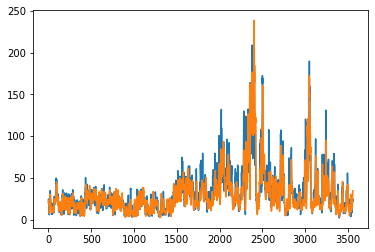

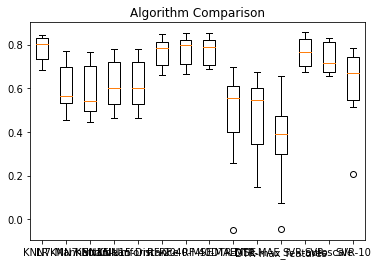

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN7-Manhattan', KNeighborsRegressor(n_neighbors=7, metric='manhattan'))) # Manhattan distance 
models.append(('KNN7-Euclidean', KNeighborsRegressor(n_neighbors=7))) # Euclidean distance
models.append(('KNN15-Uniform', KNeighborsRegressor(n_neighbors=15))) # Uniform weights
models.append(('KNN15-Distance', KNeighborsRegressor(n_neighbors=15, weights='distance'))) # Distance weights
models.append(('RF-20', RandomForestRegressor(n_estimators = 20, random_state=0))) # Ensemble method - collection of many decision trees
models.append(('RF-40-MSE', RandomForestRegressor(n_estimators = 40, random_state=0))) # mean squared error
models.append(('RF-40-MAE', RandomForestRegressor(n_estimators = 40, random_state=0, criterion='mae'))) # mean absolute error
models.append(('DTR-MSE', DecisionTreeRegressor(random_state=0)))
models.append(('DTR-MAE', DecisionTreeRegressor(random_state=0, criterion='mae')))
models.append(('DTR-max_features', DecisionTreeRegressor(random_state=0, max_features='sqrt'))) # sqrt features
models.append(('SVR-auto', SVR(gamma='auto'))) # kernel = rbf
models.append(('SVR-scale', SVR(gamma='scale'))) 
models.append(('SVR-10', SVR(C=10))) # regularization parameter C=10
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
 tscv = TimeSeriesSplit(n_splits=10)
    
 cv_results = cross_val_score(model, X_train_PM25, y_train_PM25, cv=tscv, scoring='r2')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    
for name, model in models:
  model.fit(X_train_PM25, y_train_PM25)
  y_pred_PM25 = model.predict(X_test_PM25)
  y_pred = retransform_data(scaler, y_pred_PM25)
  y_pred = y_pred.flatten()
  y_true = retransform_data(scaler, y_test_PM25)
  rmse = round(float(np.sqrt(K.eval(tf.keras.losses.mean_squared_error(y_true, y_pred)))), 3)
  r2 = round(r2_score(y_true, y_pred), 3)
  print('RMSE for %s prediction on PM25 concentration:%f' % (name, rmse))
  print('R2 score for %s prediction on PM25 concentration:%f' % (name, r2))
  plt.plot(y_true)
  plt.plot(y_pred)
  plt.show()
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()